# Домашнее задание №2

### Выполнила Кордзахия Натела БЭК181

## Часть 1. ML workflow (**всего 5 баллов**)

In [128]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

from itertools import product

### Загрузим данные для работы. 

In [129]:
df = pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [130]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [131]:
np.random.seed(100)

In [132]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Будем решать задачу регрессии: необходимо предсказать качество вина на основе его характеристик

### Шаг 1.  (**0.2 балла**)
Создайте матрицу X объект-признак и целевой вектор y ("quality")

In [133]:
y = df["quality"]
X = df.drop(columns=["quality"])

### Шаг 2. (**0.2 балла**)
Разбейте данные на train и test (доля тестовых данных - 30%).

In [134]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10)

### Шаг 3. (**0.2 балла**)
Обучите линейную регрессию на тренировочных данных и сделайте предсказания на train и на test.

In [135]:
lr_mse = LinearRegression()

lr_mse.fit(X_train, y_train)

y_pred_mse = lr_mse.predict(X_test)

pred_train = lr_mse.predict(X_train)
pred_test = lr_mse.predict(X_test)

In [136]:
pred_train

array([5.40154147, 5.90237605, 5.57124729, ..., 5.98164502, 6.31540774,
       5.70428742])

In [137]:
pred_test

array([5.65481906, 5.19758995, 5.71209694, 5.66432873, 5.38582298,
       6.30201942, 6.12593618, 5.78250392, 5.30052636, 4.94936393,
       6.29505408, 5.22578451, 5.10952383, 4.779686  , 5.24454163,
       5.18345448, 5.41947444, 5.74865968, 5.32255377, 4.66791679,
       5.03949279, 6.11692885, 5.59579034, 5.37778634, 4.97238442,
       5.64781028, 5.95632792, 5.55887775, 5.82537368, 5.26467757,
       5.23780888, 5.29263135, 5.86074263, 6.2552117 , 6.19917919,
       5.15757129, 6.56345649, 5.50631961, 5.94199724, 5.12103149,
       5.93192062, 5.96901865, 5.28173827, 6.48651733, 4.73526914,
       6.12593618, 5.64624108, 5.71354379, 6.72893915, 5.68687988,
       5.84354454, 6.67850054, 6.46319553, 6.35027088, 5.41795358,
       6.60811062, 5.64647494, 4.15338947, 5.482273  , 5.46207209,
       5.86302341, 5.28357795, 6.38641987, 5.81702148, 5.50138047,
       5.33656773, 5.6062883 , 5.63411214, 5.35616402, 5.92270325,
       5.83483945, 5.08269635, 5.56885569, 5.44932918, 5.46220

### Шаг 4. (**0.4 балла**)
Выведите на экран ошибку MSE на train и на test, затем выведите на экран ошибку r2 на train и test.  

In [138]:
print("Train MSE: {}".format(mean_squared_error(y_train, pred_train)))
print("Test MSE: {}".format(mean_squared_error(y_test, pred_test)))

Train MSE: 0.4111647926732025
Test MSE: 0.436874380560671


In [139]:
print("Train R2: {}".format(r2_score(y_train, pred_train)))
print("Test R2: {}".format(r2_score(y_test, pred_test)))

Train R2: 0.3490758916453378
Test R2: 0.37440422831407505


### Шаг 5. (**0.5 балла**)
Вычислите среднее качество (r2) модели на кросс-валидации с k=5 фолдами.

In [140]:
num_splits=5

cv_res = cross_validate(lr_mse,
                     X,
                     y,
                     scoring='r2', # метрика, которую нужно оценить
                     cv=num_splits # количество разбиений или класс-сплиттер
                    )

print(f"""Mean R2 = {cv_res['test_score'].mean()}
""")

Mean R2 = 0.2900416288421968



### Шаг 6.  (**0.5 балла**)
Теперь примените линейную регрессию с L1-регуляризацией (Lasso) для данной задачи. Объявите модель и подберите параметр регуляризации alpha по сетке. Ищите alpha в диапазоне (0.1, 1.1) с шагом 0.1. 

Осуществите подбор параметра alpha по тренировочным данным (Xtrain, ytrain).

In [141]:
from sklearn.linear_model import Lasso

for a in np.arange(0.1, 1.1, 0.1):
    if a == 0:
        a += 0.00000001
    lasso = Lasso(alpha=a)
    lasso.fit(X_train, y_train)

    y_pred_tr = lasso.predict(X_train)
    y_pred2 = lasso.predict(X_test)

    print('alpha={}'.format(a))
    print('Train MSE:', mean_squared_error(y_train, y_pred_tr))
    print('Test MSE:', mean_squared_error(y_test, y_pred2))
    print('Train R2:', r2_score(y_train, y_pred_tr))
    print('Test R2:', r2_score(y_test, y_pred2))
    print()

alpha=0.1
Train MSE: 0.4976847545853378
Test MSE: 0.512515728876129
Train R2: 0.21210421978505278
Test R2: 0.26608726175256003

alpha=0.2
Train MSE: 0.5351330153963394
Test MSE: 0.5675610778458681
Train R2: 0.1528190469973908
Test R2: 0.18726337301307683

alpha=0.30000000000000004
Train MSE: 0.5819565909248602
Test MSE: 0.6334879671034283
Train R2: 0.07869160541193321
Test R2: 0.09285732634353971

alpha=0.4
Train MSE: 0.6114176556933043
Test MSE: 0.6727793070985487
Train R2: 0.032051139940901474
Test R2: 0.036592877663176315

alpha=0.5
Train MSE: 0.6114994483386647
Test MSE: 0.6730144105696201
Train R2: 0.03192165218878873
Test R2: 0.03625621398145107

alpha=0.6
Train MSE: 0.6115994171274385
Test MSE: 0.6732666655642414
Train R2: 0.03176338938065082
Test R2: 0.03589498964547788

alpha=0.7000000000000001
Train MSE: 0.6117175620596257
Test MSE: 0.6735360720824126
Train R2: 0.031576351516487966
Test R2: 0.03550920465525664

alpha=0.8
Train MSE: 0.6118538831352263
Test MSE: 0.6738226301241

### Шаг 7.  (**0.5 балла**)
Выведите наилучший алгоритм и наилучшее качество по результатам подбора alpha (best_estimator_ и best_score_).

Лучший подбор был при альфа = 0,1

In [142]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred_tr = lasso.predict(X_train)
y_pred2 = lasso.predict(X_test)

In [143]:
params = {'alpha': [0.1]}
#print(params)
cv = GridSearchCV(lasso,
                  params,
                  scoring='r2',
                  cv=num_splits
                 )
cv.fit(X, y)

print(cv.best_params_)

{'alpha': 0.1}


In [144]:
cv.best_estimator_

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [145]:
cv.best_score_

0.1789188519896965

### Шаг 8.  (**0.5 балла**)

С помощью найденного best_estimator_ сделайте предсказание на тестовых данных и выведите на экран r2-score на тесте.

In [146]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

lasso = Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
lasso.fit(X, y)

y_pred = lasso.predict(X_test)

print(f'''
R2={r2_score(y_test, y_pred)}
''')


R2=0.28172413874339297



In [147]:
#your code here

### Шаг 9.  (**0.5 балла**)

Попробуем улучшить качество модели за счет добавления полиномиальных признаков. Создайте pipeline, состоящий из добавления полиномиальных признаков степени 2, а затем применения линейной регрессии.

Затем вычислите r2-score этой модели на кросс валидации с пятью фолдами.

In [148]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [149]:
lin_pipe = Pipeline([('poly', PolynomialFeatures(degree=2)),
                       ('model_', LinearRegression())])

In [150]:
num_splits=5

cv_res_pipe = cross_validate(lin_pipe,
                     X,
                     y,
                     scoring='r2', # метрика, которую нужно оценить
                     cv=num_splits # количество разбиений или класс-сплиттер
                    )

print(f"""R2 = {cv_res_pipe['test_score']}
""")

R2 = [-0.03990651  0.29930017  0.38080624  0.30145898  0.20882196]



In [151]:
cv_res_pipe['test_score'].mean()

0.23009616781807507

### Шаг 10.  (**0.5 балла**)
Обучите модель (pipeline) на тренировочных данных и сделайте предсказания для train и test, затем выведите на экран r2-score и MSE на тренировочных и на тестовых данных.

In [152]:
lin_pipe.fit(X_train, y_train)


y_p_train = lin_pipe.predict(X_train)
y_p_test = lin_pipe.predict(X_test)

print(f'''Train
MSE={mean_squared_error(y_train, y_p_train)}
R2={r2_score(y_train, y_p_train)}
''')


print(f'''Test
MSE={mean_squared_error(y_test, y_p_test)}
R2={r2_score(y_test, y_p_test)}
''')

Train
MSE=0.3481120066329512
R2=0.4488961565704742

Test
MSE=0.4498539752395979
R2=0.3558176965542751



In [29]:
#your code here

### Сделайте выводы. Для этого ответьте на вопросы: (**1 балл**)

1) Хорошее ли качество показала исходная модель (линейная регрессия без регуляризации)? Является ли эта модель переобученной?

Train R2: 0.3490758916453378
Test R2: 0.37440422831407505

        На тесте R2 вырос, что хорошо, но MSE тоже вырос... Но в целом в сравнении с тем, что дальше получается, линейная регрессия справилась очень даже достойно. Параметры все равно достаточно неудовлетворительные, поэтому можно предположить, что она переобучена. Я покрутила параметры потом, результаты примерно одинаковые.

2) Помогла ли L1-регуляризация улучшить качество модели?

        Как-то не очень, с ростом альфа параметры начали ухудшаться. Значит чем больше ее вес, тем хуже у нас параметры, и тут не подойдет регуляризация для улучшения качества модели

3) Помогло ли добавление полиномов второй степени улучшить качество модели? Как добавление новых признаков повлияло на переобучение?

       Тоже не очень сильно помогло, кажется модель переобучилась, потому что R2 стал меньше, а MSE -  в разы больше на тесте. Мы добавили больше признаков и модель сошла с ума. Но при этом на пайплайне вроде как близкие к обычной регрессии результаты получились

In [30]:
#your answer here

### *Попытайтесь улучшить модель (добейтесь наилучшего качества) - можно использовать любые методы.

При улучшении качества r2 на 0.1-0.2 +1 балл, при большем улучшении +2 балла (дополнительно к 5 баллам за основную часть).


Знаю, что за попытки баллов не дают, но я пошла и посмотрела семинары пррошлых лет про всякие леса и попробовалаа несколько методов, нооо что-то все не так и не то

In [60]:
y = df["quality"]
X = df.drop(columns=["quality"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.8, random_state=100)

In [111]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

for n in [10, 100, 500, 1000, 10000]:
    print('n_estimators:', n)
    
    model_rf = RandomForestRegressor(n_estimators=n, n_jobs=-1)

    score = cross_val_score(model_rf, X, y, cv=5, scoring='r2').mean()

    print('r2:', score)

n_estimators: 10
r2: 0.24347745865470571
n_estimators: 100
r2: 0.3095271742700878
n_estimators: 500
r2: 0.31860495854793297
n_estimators: 1000
r2: 0.3177068615088836
n_estimators: 10000
r2: 0.3181717398883063


In [120]:
from sklearn.model_selection import GridSearchCV

model_rf = RandomForestRegressor(n_estimators=600, n_jobs=-1, random_state=123)

params = {'max_features': ['auto', 'log2', 'sqrt'], 
          'max_depth': [2, 6, 10, 20, 50],
          'min_samples_leaf': [1, 5, 10, 15, 20]}

gs = GridSearchCV(model_rf,
                  params,
                  cv=3,
                  scoring='r2',
                  n_jobs=-1)
gs.fit(X, y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=600, n_jobs=-1,
                                             oob_score=False, random_state=123,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [2, 6, 10, 20, 50],
      

In [122]:
gs.best_estimator_, gs.best_score_

(RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                       max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False), 0.3528069105243028)

In [123]:
cv_grid = pd.DataFrame(gs.cv_results_['params'])

cv_grid['mean_test_score'] = gs.cv_results_['mean_test_score']
cv_grid.head()

,max_depth,max_features,min_samples_leaf,mean_test_score
0,2,auto,1,0.269610
1,2,auto,5,0.270350
2,2,auto,10,0.269973
3,2,auto,15,0.269149
4,2,auto,20,0.268704


In [126]:
import seaborn as sns
sns.set(style='whitegrid')


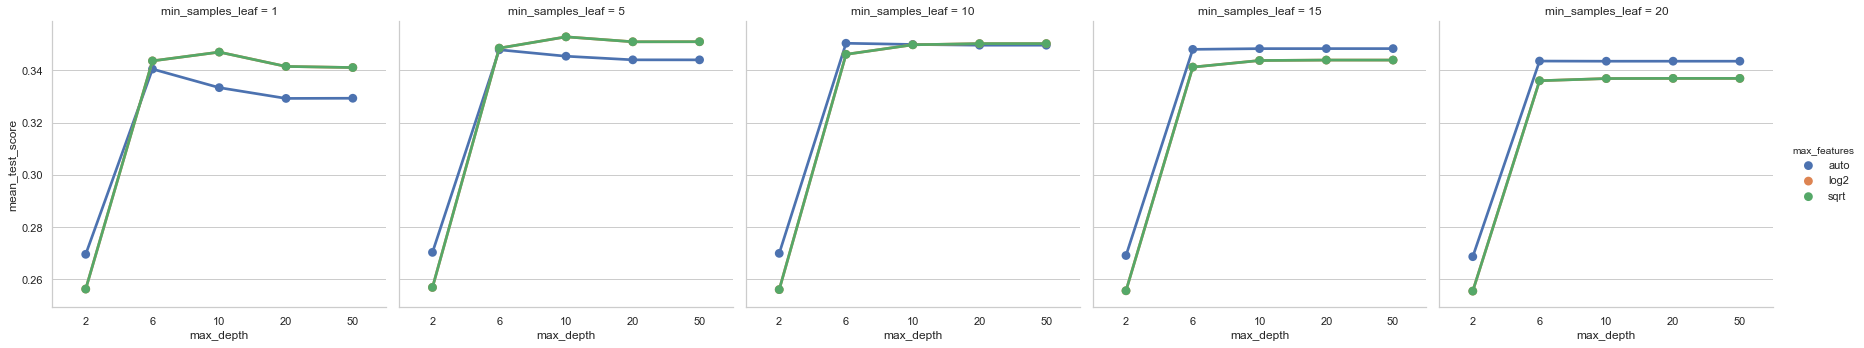

In [127]:
sns.catplot(x='max_depth', y='mean_test_score', data=cv_grid,
            col='min_samples_leaf', hue='max_features',
            kind='point')

In [119]:
lasso2 = Lasso(alpha=1e-17, copy_X=True, fit_intercept=True, max_iter=100,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.00001, warm_start=False)
lasso2.fit(X, y)

y_pred = lasso2.predict(X_test)

print(f'''
R2={r2_score(y_test, y_pred)}
''')


R2=-973.0912066263259



/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 333.20535012832124, tolerance: 0.010421651031894933
  positive)


Как-то прям не знаю((((((((((((

## Часть 2. Target encoding (**всего 5 баллов**)

В этом части домашнего задания вы будете работать с выборкой `1C`. Вам нужно посчитать счетчики для `item_id` четырьмя способами:

    1) При помощи KFold схемы;  
    2) При помощи Leave-one-out схемы;
    3) При помощи smoothing схемы;
    4) При помощи expanding mean схемы.

### Подготовка данных

In [296]:
sales = pd.read_csv('sales_train.csv.gz')
sales.columns = ['date', 'date_block_num', 'shop_id', 'item_id', 'item_price', 'target']
sales

,date,date_block_num,shop_id,item_id,item_price,target
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [297]:
index_cols = ['shop_id', 'item_id', 'date_block_num']

# For every month we create a grid from all shops/items combinations from that month
grid = [] 
for block_num in sales['date_block_num'].unique():
    cur_shops = sales[sales['date_block_num']==block_num]['shop_id'].unique()
    cur_items = sales[sales['date_block_num']==block_num]['item_id'].unique()
    grid.append(np.array(list(product(*[cur_shops, cur_items, [block_num]])),dtype='int32'))

#turn the grid into pandas dataframe
grid = pd.DataFrame(np.vstack(grid), columns = index_cols,dtype=np.int32)

#get aggregated values for (shop_id, item_id, month)
gb = sales.groupby(index_cols,as_index=False).agg({'target':'sum'})

#join aggregated data to the grid
all_data = pd.merge(grid,gb,how='left',on=index_cols).fillna(0)
#sort the data
all_data.sort_values(['date_block_num','shop_id','item_id'],inplace=True)

In [298]:
all_data

,shop_id,item_id,date_block_num,target
139255,0,19,0,0.0
141495,0,27,0,0.0
144968,0,28,0,0.0
142661,0,29,0,0.0
138947,0,32,0,6.0
...,...,...,...,...
10768834,59,22162,33,0.0
10769024,59,22163,33,0.0
10769690,59,22164,33,0.0
10771216,59,22166,33,0.0


### Mean encodings без регуляризации

После проделанной технической работы, мы готовы посчитать счетчики для переменной `item_id`. 

Ниже приведены две реализации подсчета счетчиков без регуляризации. Можно использовать данный код в качестве стартовой точки для реализации различных техник регуляризации.

#### Способ 1

In [299]:
# Calculate a mapping: {item_id: target_mean}
item_id_target_mean = all_data.groupby('item_id').target.mean()

# In our non-regularized case we just *map* the computed means to the `item_id`'s
all_data['item_target_enc'] = all_data['item_id'].map(item_id_target_mean)

# Fill NaNs
all_data['item_target_enc'].fillna(0.3343, inplace=True) 

# Print correlation
encoded_feature = all_data['item_target_enc'].values
print(np.corrcoef(all_data['target'].values, encoded_feature)[0][1])

0.4830386988621791


#### Способ 2

In [300]:
'''
     Differently to `.target.mean()` function `transform` 
   will return a dataframe with an index like in `all_data`.
   Basically this single line of code is equivalent to the first two lines from of Method 1.
'''
all_data['item_target_enc'] = all_data.groupby('item_id')['target'].transform('mean')

# Fill NaNs
all_data['item_target_enc'].fillna(0.3343, inplace=True) 

# Print correlation
encoded_feature = all_data['item_target_enc'].values
print(np.corrcoef(all_data['target'].values, encoded_feature)[0][1])

0.4830386988621791


###  KFold схема (**1.25 балла**)

Необходимо реализовать Kfold схему с пятью фолдами. Используйте KFold(5) из sklearn.model_selection. 

1. Разбейте данные на 5 фолдов при помощи `sklearn.model_selection.KFold` с параметром `shuffle=False`.
2. Проитерируйтесь по фолдам: используйте 4 обучающих фолда для подсчета средних значений таргета по `item_id` и заполните этими значениями валидационный фолд на каждой итерации.

Обратите внимание на **Способ 1** из примера. В частности, изучите, как работают функции map и pd.Series.map. Они довольно полезны во многих ситуациях. 

In [301]:
from sklearn.model_selection import KFold


kf = KFold(n_splits=5,shuffle=False)
df_kf5 = all_data.copy()
df_kf5['kf5'] = np.nan
target = all_data['target'].values

for train_index, test_index in kf.split(all_data):
    x_train = all_data.iloc[train_index]
    x_test = all_data.iloc[test_index]
    train_mean = x_train.groupby('item_id').target.mean()
    means = x_test['item_id'].map(train_mean)
    x_test['kf5'] = means
    
    df_kf5.iloc[test_index] = x_test 

# Fill NaNs
df_kf5['kf5'].fillna(0.3343, inplace=True) 
encoded_feature = df_kf5['kf5'].values

# You will need to compute correlation like that
corr = np.corrcoef(train_new['target'], encoded_feature)[0][1]
print(corr)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0.41645907127988024


Ожидаемый ответ 0.4165

### Leave-one-out схема (**1.25 балла**)

Необходимо реализовать leave-one-out схему . Учтите, если вы запустите код из первого задания, задав количество фолдов такое же как размер выборки, то вы, вероятно, получите правильный ответ, но ждать будете очень-очень долго.

Для более быстрой реализации подсчета среднего таргета на всех объектах, кроме одного, вы можете:

1. Вычислить суммарный таргет по всем объектам.
2. Вычесть таргет конкретного объекта и разделить результат на `n_objects - 1`. 

Заметим, что пункт `1.` следует сделать для всех объектов. Также заметим, что пункт `2.` может быть реализован без циклов `for`.

Здесь может оказаться полезной функция .transform из **Способа 2** из примера.

In [302]:
df_loo = all_data.copy()


df_loo['loo'] = np.nan
df_loo['loo'] = (df_loo.groupby('item_id')['target'].transform("sum") - df_loo['target'])/ df_loo.groupby('item_id')['target'].transform("count") - 1

encoded_feature = df_loo['loo'].values
corr = np.corrcoef(all_data['target'].values, encoded_feature)[0][1]
print(corr)

0.48039280661981704


Ожидаемый ответ 0.4803

### Smoothing (**1.25 балла**)

Необходимо реализовать smoothing с $\alpha = 100$. Используйте формулу:

$\frac{mean(target) \cdot nrows + globalmean \cdot \alpha }{nrows + \alpha}$,

где $globalmean=0.3343$. Заметим, что `nrows` - это количество объектов, принадлежащих конктертной категории, а не количество строк в датасете.

In [303]:
df_smooth = all_data.copy()
alpha = 100
global_mean = 0.3343
mean_target = df_smooth.groupby('item_id')['target'].transform('mean')
nrows = df_smooth.groupby('item_id')['target'].transform("count")

df_smooth['smooth'] = np.nan
df_smooth['smooth'] = (mean_target * nrows + global_mean * alpha) / (nrows + alpha)

encoded_feature = df_smooth['smooth'].values
print(np.corrcoef(all_data['target'].values, encoded_feature)[0][1])

0.4818198797097282


Ожидаемый ответ 0.4818

### Expanding mean схема (**1.25 балла**)

Необходимо реализовать *expanding mean* схему. Ее суть заключается в том, чтобы пройти по отсортированному в определенном порядке датасету (датасет сортируется в самом начале задания) и для подсчета счетчика для строки $m$ использовать строки от $0$ до $m-1$. Вам будет необходимо воспользоваться pandas функциями [`cumsum`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.DataFrameGroupBy.cumsum.html) и [`cumcount`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.GroupBy.cumcount.html).

In [304]:
df_em = all_data.copy()


df_em['item_target_enc'] = np.nan
df_em['item_target_enc'] = (df_em.groupby('item_id')['target'].cumsum() - df_em['target'])/df_em.groupby('item_id').cumcount()
df_em['item_target_enc'].fillna(0.3343, inplace=True)
encoded_feature = df_em['item_target_enc'].values

corr = np.corrcoef(all_data['target'].values, encoded_feature)[0][1]
print(corr)


0.5025245211081701


Ожидаемый ответ 0.5025

Тяжелая катка была...